# Thông tin

*   MSSV: 19521820
*   Họ và tên: Đặng Xuân Mai
*   Bài tập 2
*   Ngày thực hiện: 08/03/2022

# Kết nối đến Google Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# Đặt các đường dẫn

In [2]:
import os
dir_monhoc = '/gdrive/MyDrive/CS231.M22.KHCL'

In [3]:
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap2')
dir_images = os.path.join(dir_baitap, 'images')

# Yêu cầu 1

## Đọc ảnh

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow

In [11]:
# Hàm đọc ảnh
def ReadImage(file_name):
  path_filename = os.path.join(dir_images, file_name)
  image = cv.imread(path_filename, 0)
  return image

In [12]:
bicycle = ReadImage('Bicycle.jpg')

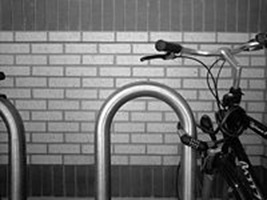

In [13]:
cv2_imshow(bicycle)

In [14]:
bansoxe = ReadImage('bansoxe.jpg')

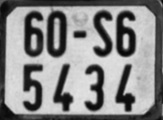

In [15]:
cv2_imshow(bansoxe)

## Hàm dò tìm Gx, Gy và G

In [60]:
def CalculateSobel(img):
  sobelx = cv.Sobel(img, cv.CV_64F,1,0,ksize=5) 
  sobely = cv.Sobel(img, cv.CV_64F,0,1,ksize=5)  
  sobel = cv.addWeighted(sobelx, 0.5, sobely, 0.5, 0)
  return sobelx, sobely, sobel

In [61]:
bicycleX, bicycleY, bicycleSobel = CalculateSobel(bicycle)
bansoxeX, bansoxeY, bansoxeSobel = CalculateSobel(bansoxe) 

Ref: https://www.bogotobogo.com/python/OpenCV_Python/python_opencv3_Image_Gradient_Sobel_Laplacian_Derivatives_Edge_Detection.php

Ref: https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/

## Hàm show kết quả

In [62]:
from matplotlib import pyplot as plt

In [63]:
def ShowImages(images, rows, columns, titles):
  plt.figure(figsize=(10, 10))
  for i in range(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(titles[i])

In [64]:
bicycle_names = [bicycle, bicycleX, bicycleY, bicycleSobel]
bansoxe_names = [bansoxe, bansoxeX, bansoxeY, bansoxeSobel]
titles = ['Source image', 'Sobel X', 'Sobel Y', 'Sobel image']

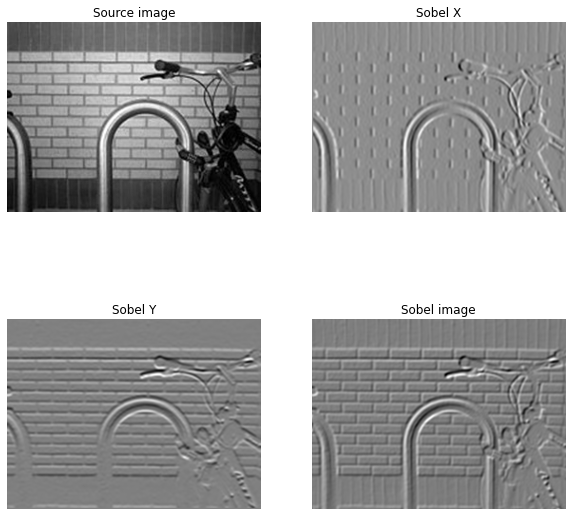

In [65]:
ShowImages(bicycle_names, 2, 2, titles)

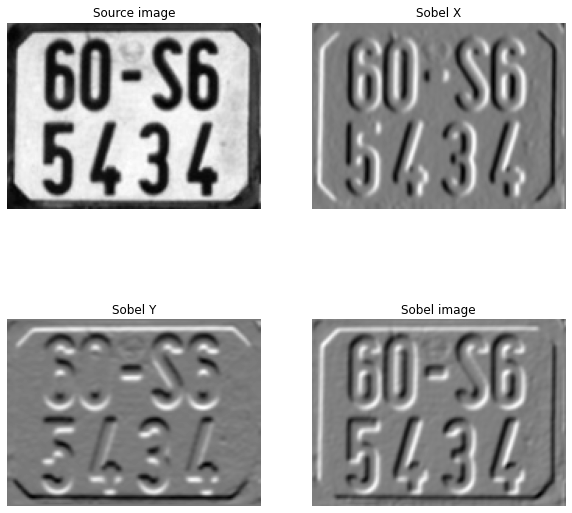

In [66]:
ShowImages(bansoxe_names, 2, 2, titles)

# Yêu cầu 2

## Đọc ảnh

In [67]:
img1 = ReadImage('image_0814.jpg')
img2 = ReadImage('image_0816.jpg')
img3 = ReadImage('image_1248.jpg')

## Hàm xác định đặc trưng ảnh

In [72]:
import numpy as np

In [73]:
def sobel_filters(img):
  Sx=np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
  Sy=np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)
  Ix = cv.filter2D(img, -1, Sx)
  Iy = cv.filter2D(img, -1, Sy)
  G=np.hypot(Ix,Iy)
  G=G/G.max()*255
  theta=np.arctan2(Iy,Ix)
  return Ix,Iy,G,theta

In [74]:
def calFeatureVector(img):
  img_ = cv.resize(img, (256, 256))
  _, _, G, _ = sobel_filters(img_)
  row_sum = np.sum(G, axis=1, dtype=np.float64)
  col_sum = np.sum(G, axis=0, dtype=np.float64)
  return (np.hstack((row_sum.T, col_sum)))

In [82]:
feature1 = calFeatureVector(img1)
feature2 = calFeatureVector(img2)
feature3 = calFeatureVector(img3)

## Tính khoảng cách euclidean giữa hai ảnh

In [78]:
from scipy.spatial import distance

In [79]:
def CalculateDistance(feature1, feature2):
  return distance.euclidean(feature1, feature2)

In [83]:
# Cặp ảnh 1 - 2
CalculateDistance(feature1, feature2)

55432.88078311733

In [84]:
# Cặp ảnh 1 - 3
CalculateDistance(feature1, feature3)

92123.37554385341

## Tính sự tương đồng Cosine giữa hai ảnh

In [80]:
def CalculateCosine(feature1, feature2):
  return 1 - distance.cosine(feature1, feature2)

In [85]:
# Cặp ảnh 1 - 2
CalculateCosine(feature1, feature2)

0.9403013260778476

In [87]:
# Cặp ảnh 1 - 3
CalculateCosine(feature1, feature3)

0.8133452847890963